In [14]:
# Initial imports
import numpy as np
import pandas as pd
from pathlib import Path
import yfinance as yf
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
x = "AAPL"

stock = yf.Ticker(x)

hist = stock.history(period="5y")

# Create an empty DataFrame for closing prices
signals_df = pd.DataFrame()

# Fetch the closing prices
signals_df[x] = hist["Close"]

signals_df.head()

,AAPL
Date,
2016-01-19,22.388184
2016-01-20,22.418295
2016-01-21,22.304800
2016-01-22,23.490686
2016-01-25,23.032082


In [3]:
from statsmodels.tsa.arima_model import ARIMA

# Estimate and ARIMA Model:
# Hint: ARIMA(df, order=(p, d, q))
model = ARIMA(signals_df, order=(5, 1, 1))

# Fit the model
results = model.fit()

C:\Users\ttanh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\ttanh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


In [4]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                 D.AAPL   No. Observations:                 1258
Model:                 ARIMA(5, 1, 1)   Log Likelihood               -2101.668
Method:                       css-mle   S.D. of innovations              1.286
Date:                Sat, 16 Jan 2021   AIC                           4219.335
Time:                        22:56:14   BIC                           4260.434
Sample:                             1   HQIC                          4234.781
                                                                              
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0835      0.033      2.526      0.012       0.019       0.148
ar.L1.D.AAPL    -1.0124      0.083    -12.163      0.000      -1.176      -0.849
ar.L2.D.AAPL    -0.0999      0.042     -2.397      0.017      -0.182      -0.018
ar.L3.D.AAPL     0.0136      0.040      0.336      0.737      -0.065       0.093
ar.L4.D.AAPL    -0.0188      0.040     -0.466      0.641      -0.098       0.060
ar.L5.D.AAPL     0.0457      0.036      1.279      0.201      -0.024       0.116
ma.L1.D.AAPL     0.8884      0.079     11.182      0.000       0.733       1.044
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.2755           -0.2868j            1.3074           -0.4648
AR.2           -1.2755           +0.2868j            1.3074            0.4648
AR.3            2.5313           -0.0000j            2.5313           -0.0000
AR.4            0.2150           -2.2376j            2.2479           -0.2348
AR.5            0.2150           +2.2376j            2.2479            0.2348
MA.1           -1.1256           +0.0000j            1.1256            0.5000
-----------------------------------------------------------------------------
"""

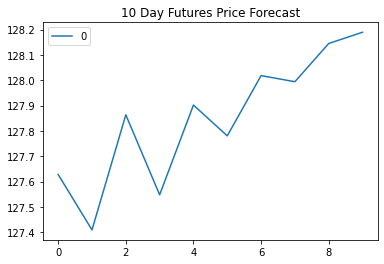

In [5]:
pd.DataFrame(results.forecast(steps=10)[0]).plot(title="10 Day Futures Price Forecast")